# These simulations are based on the paper
# Ashwin & Borresen: Discrete computation using a perturbed heteroclinic network, PLA 2005

We consider the unperturbed network

$\dot{\Theta}_i = \omega + \frac{1}{N} \sum_{j=1}^N g(\Theta_i - \Theta_j)$,

where $g(\Phi) = -\sin(\Phi + \alpha) + r\sin(2\Phi)$.

The parameters are $N=5, \alpha=1.25, \omega=5, r=0.25$.

A stable orbit is defined by phase locking of the oscillators and thus by constant phase differences between them, i.e. $\dot{\Theta_1}=\dot{\Theta_2}=...=\dot{\Theta_5}$.

Such a condition is satisfied for orbits $P_j^k$ in the set of permutations of $(0,0,0,\psi_j,\psi_j)$, where $k$ is an index identifying the permutation.

Plugging the requirement $\dot{\Theta_1}=\dot{\Theta_2}=...=\dot{\Theta_5}$ for any orbit $P_j^k$ into the differential equation for $\dot{\Theta_i}$ returns

$3g(0)+2g(-\psi_j) = 2g(0) + 3 g(\psi_j)$

and thus

$g(0) - 2\sin(1.25-\psi_j) + 3\sin(\psi_j +1.25)-1.25\sin(2\psi_j)$. Use $g(0) = -0.949$.

The $\psi_j \in (-2\pi, 2\pi)$ solving the equation are approximately: $\{-5.096, -3.634, -0.695, 0, 1.187, 2.650, 5.588  \}$.

This is equivalent to phase differences $\psi_j \in \{ 0, 0.695, 1.187, 2.649  \}$, as a phase difference of $\Delta \Theta > \pi$ is equivalent to a phase difference $2\pi - \Delta \Theta$. Computations suggest that the equilibrium points $\{0, 2.649 \}$ are unstable while $\{ 0.695, 1.187\}$ are stable (set adequate initial phase vectors phi below).  

## Pseudocode for phase differences

phase difference = abs(phase difference)

if phase difference > pi:

    phase difference = 2*pi - phase difference

  1%|          | 572/100000 [00:00<00:34, 2841.52it/s]

Starting value of phi is
[ 2.04 -2.85 -0.18 -1.76  2.71]


100%|██████████| 100000/100000 [00:36<00:00, 2712.90it/s]


Oscillators in first group:
[1 2 5]
Oscillators in second group:
[3 4]

There are 2 different oscillator phases after the last iteration. 

Phase Differenc Matrix after last iteration:
[[0.         0.         1.18682566 1.18682566 0.        ]
 [0.         0.         1.18682566 1.18682566 0.        ]
 [1.18682566 1.18682566 0.         0.         1.18682566]
 [1.18682566 1.18682566 0.         0.         1.18682566]
 [0.         0.         1.18682566 1.18682566 0.        ]]

 



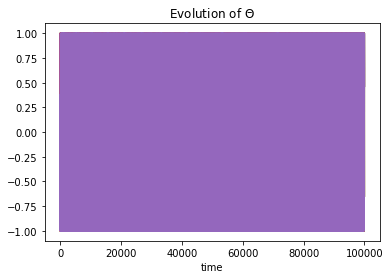

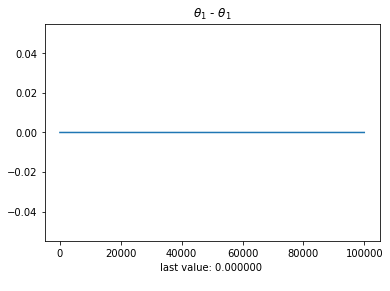

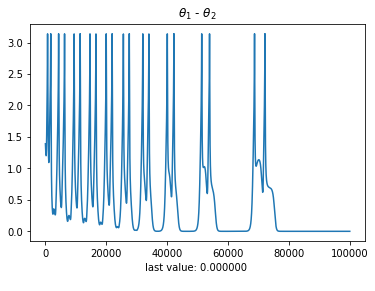

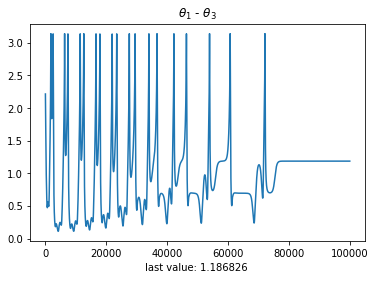

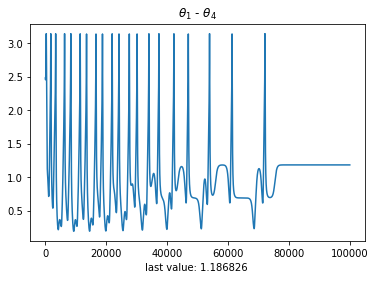

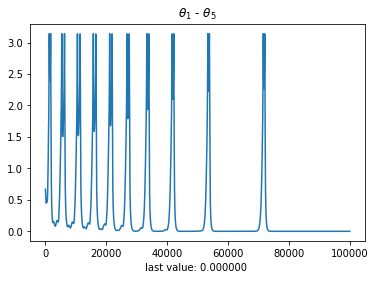

In [32]:
# Define starting value for phase phi and no. of timesteps
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

N = 5
omega = 5
dt = 0.01
timesteps = 100_000

# ================================== #
# Does not reach stationary state
#phi = np.zeros(N)+[0,3,0.5,1.339,2]
# ================================== #
# To reach stationary state:
# Ashwin: "For the parameter values used in this Letter the only attractor for the unperturbed system consists of twenty orbits with symmetry S2xS3"
# phi = np.random.uniform(low=-2*np.pi,high=2*np.pi,size=5)

# Create random 3vs2 starting vector
# ================================================
first_starting_value =  np.random.uniform(low=-2*np.pi,high=2*np.pi)
second_starting_value = np.random.uniform(low=-2*np.pi,high=2*np.pi)

phi = np.concatenate((np.ones(3)*first_starting_value,np.ones(2)*second_starting_value))
np.random.permutation(phi)
# ================================================
# ================================================


# Create random (N-k)v(k) starting vector, 0<=k<=N
# ================================================
first_starting_value =  np.random.uniform(low=-2*np.pi,high=2*np.pi)
second_starting_value = np.random.uniform(low=-2*np.pi,high=2*np.pi)

k = np.random.randint(0,N+1)
k=1

phi = np.concatenate((np.ones(k)*first_starting_value,np.ones(N-k)*second_starting_value))
np.random.permutation(phi)
# ================================================
# ================================================


# Other starting vectors
# ================================================
# Reaches 4v1 steady state:
##phi = np.array([-1.7, -1.7, -1.7, -1.7, -2.4])

# Starting vector close to eq. point 0:
##phi = np.array([0, 0, 0, np.random.normal(loc=0,scale=0.1), np.random.normal(loc=0,scale=0.1)], dtype='float64')

# Starting vector close to eq. point 2.649:
##phi = np.array([0, 0, 0, 2.649, 2.649], dtype='float64')

##phi = np.array([0,0,0,1.339,1.339]) + np.random.normal(loc=0,scale=0.1,size=5)

# Uniformly distributed random starting vector
##phi = np.random.uniform(low = -np.pi, high = np.pi, size = 5)

# Reaches stationary state after ~80k iterations and appears to transiently switch between periodic orbits (originally randomly initiated starting vector):
phi = np.array([2.04, -2.85, -0.18, -1.76, 2.71])
# ================================================
# ================================================

# Simulation
# ===========================================================
def g(phi):
    alpha = 1.25
    r = 0.25
    return -np.sin(phi + alpha) + r*np.sin(2*phi)

def phase_diffs(phi):
    phase_differences = np.zeros((5,5))
    for row in range(5):
        for col in range(5):
            phase_differences[row,col] = abs(phi[row]%(2*np.pi) - phi[col]%(2*np.pi))
            
            if phase_differences[row,col] > np.pi:
                phase_differences[row,col] = 2*np.pi - phase_differences[row,col]
            
            phase_differences[row,col] = np.round(phase_differences[row,col],decimals=8)
            
    return phase_differences

phi_hist = np.zeros((N,timesteps))
phi_hist[:,0] = phi        
            
phase_diff_hist = np.zeros((timesteps,N,N))
phase_diff_hist[0,:,:] = phase_diffs(phi).reshape(1,5,5)

print('Starting value of phi is')
print(phi)

for t in tqdm(range(timesteps)):
    summation = 0*phi
    for angle in phi:
        summation += g(phi - angle)
    
    dphidt = omega + 1/N * summation
    
    phi = phi + dphidt*dt
    
    phi_hist[:, t] = phi
    phase_diff_hist[t,:,:] =  phase_diffs(phi).reshape(1,5,5)    

    
# END OF SIMULATION 
# ===========================================================
# ===========================================================  

# Find number of different oscillator phases  
# ===========================================================
from collections import Counter
# Determine the number of different phase shifts oscillator 1 has with all other oscillators at the end
# This is equivalent to the number of different phases
differences = Counter(np.round(phase_diff_hist[-1,1,:],4).tolist()).keys()
# If Oscillator 1 hase phase shift of 0 with some other oscillator, it is in a "phase group" with that oscillator.
# If Oscillator 1 does not have phase shift of 0 with some other oscillator, then Osci 1 is in its own group.
if 0 in differences:
    no_of_groups = len(differences)
else:
    no_of_groups = len(differences) + 1

if no_of_groups == 2:
    first_group=np.where(phase_diff_hist[-1,0,:] == 0)
    second_group=np.where(phase_diff_hist[-1,0,:] != 0)
    print('Oscillators in first group:')
    print(first_group[0]+1)
    print('Oscillators in second group:')
    print(second_group[0]+1)

print('\nThere are %d different oscillator phases after the last iteration. \n'%no_of_groups)
# ===========================================================
# ===========================================================  

print('Phase Differenc Matrix after last iteration:')
print(phase_diff_hist[-1,:,:])
print('\n \n')

    
%matplotlib inline

plt.figure()
for i in range(N):
    plt.plot(np.sin(phi_hist[i,:]))

#plt.yscale('log')
plt.title(r'Evolution of $\Theta$')
plt.xlabel('time')
plt.show()

for i in range(N):
    plt.figure()
    plt.plot(phase_diff_hist[:,0,i])
    plt.title(r'$\theta_1$ - $\theta_%d$'%(i+1))
    plt.xlabel('last value: %f \n'%phase_diff_hist[-1,0,i])
    plt.show()

# Additional Analysis

<IPython.core.display.Javascript object>


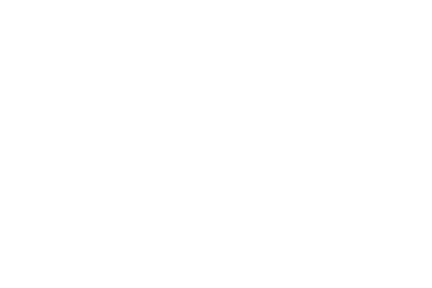

<IPython.core.display.Javascript object>


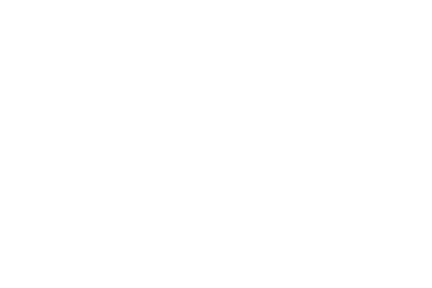

In [33]:
from importlib import reload
reload(plt)

%matplotlib notebook
%matplotlib notebook

plt.figure()

for i in range(N):
    plt.plot(np.sin(phi_hist[i,:]))

#plt.yscale('log')
plt.title(r'Evolution of sin($\Theta$)')
plt.xlabel('timestep')
#
plt.show()

In [97]:
# Find peaks of sin(theta), i.e. modes of the signal
import scipy.signal
maxima = [[0] for i in range(N)]

for n in range(N):
    print('n=%d'%n)
    pks = scipy.signal.find_peaks(np.sin(phi_hist[n,:]))
    maxima[n] = pks[0].tolist()

n=0
n=1
n=2
n=3
n=4


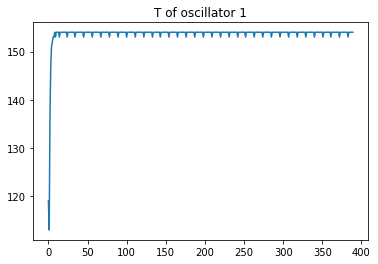

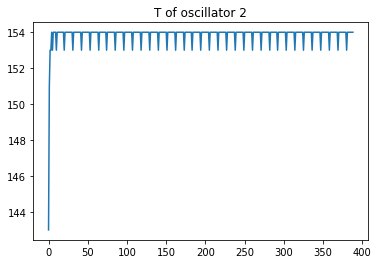

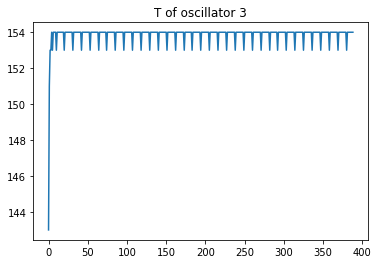

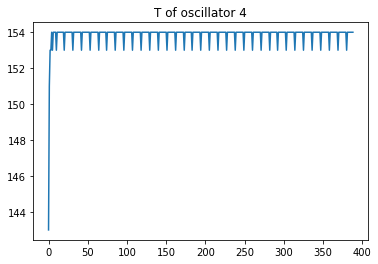

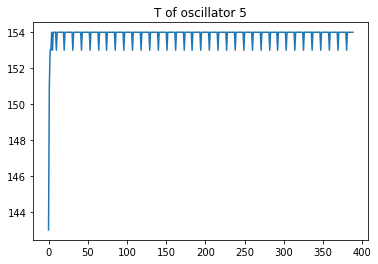

In [98]:
%matplotlib inline
            
for n in range(N):
    periods = np.diff(np.array(maxima[n]))
    plt.figure()
    plt.plot(periods)
    plt.title('T of oscillator %d'%(n+1))
    plt.show()

<IPython.core.display.Javascript object>


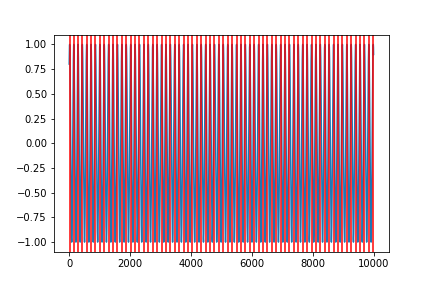

<IPython.core.display.Javascript object>


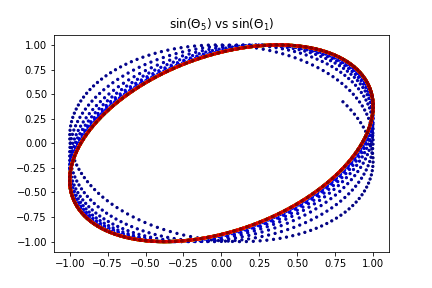

<IPython.core.display.Javascript object>


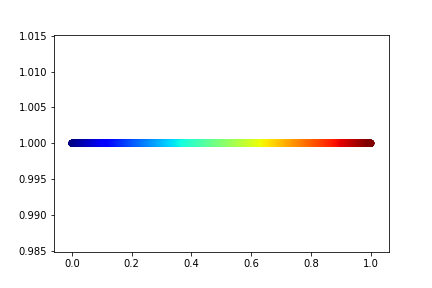

In [43]:
%matplotlib notebook
plt.figure()
plt.plot(test)
for line in maxima[0]:
    plt.axvline(x=line,color='r')
plt.show()

plt.figure()
t = np.linspace(0,1,phi_hist.shape[1])
plt.scatter(np.sin(phi_hist[0,:]),np.sin(phi_hist[4,:]),c=t,s=5, cmap ='jet')
plt.title(r'sin($\Theta_5$) vs sin($\Theta_1$)')
plt.show()

plt.figure()
plt.scatter(t,t*0+1,c=t,cmap='jet')
plt.show()